<a href="https://colab.research.google.com/github/shahidzk1/Numerical_analysis/blob/shahid_version/Exponential_decay_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In experimental physics generally detector data is receieved from a detector which measures some quantity e.g. charge depositied on a cathode plate in a gas chamber detector. The data of the measurement is saved and later analyzed to find hidden physics. Here we will simulate nuclei decay and their data received by a detector. Then we will analyze the data by using single variable linear-regression and calculate the half life of the nuclei. From this then one can estimate the nuclei species.

In [104]:
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar

Let's have an exponentially decaying nuclei. Since decay is a quantum mechanical process, so some nuclei will decay with one mean lifetime while others with other. To simulate them we take the independent time variable as x and make an exponentially decaying function y.  We take the detector and atmospheric noise as a combined source in the form of noise. Add the noise to the signal i.e. y and create data.

In [97]:
x = np.arange(0,400,1)
y = 150*np.exp(-x/200)
noise = np.random.normal(0,10, len(y))
z = y+noise
data = np.abs(z) #signal cannot be negative so we remove negative values

(array([  6.,  11.,  42., 107., 102.,  75.,  37.,  15.,   3.,   2.]),
 array([-29.13773874, -22.54798098, -15.95822322,  -9.36846545,
         -2.77870769,   3.81105008,  10.40080784,  16.9905656 ,
         23.58032337,  30.17008113,  36.7598389 ]),
 <BarContainer object of 10 artists>)

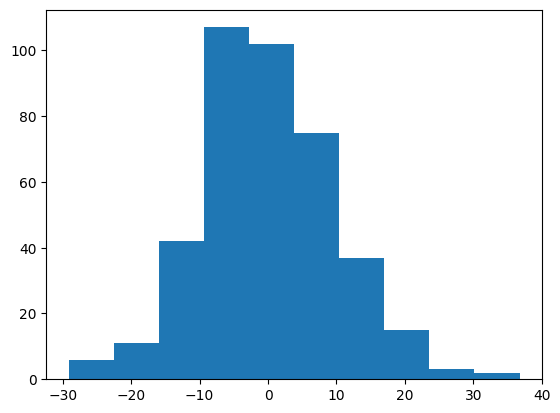

In [105]:
#plotting the noise
plt.hist(noise)

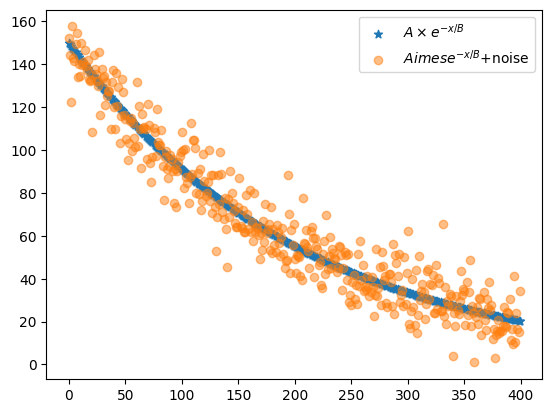

In [99]:
plt.scatter(x,y, marker='*', label=r'$A \times e^{-x/B}$')
plt.scatter(x,data, alpha = 0.5, label='$A \times e^{-x/B}$+noise')
plt.legend()

# Fitting Routine
Here we will plot the data and analyze it using a sinle variable linear-regression.

In [100]:
#we define the total fit function
def exp1(x,A,B):
  return A*np.exp(-x/B)


#p0 is the intialization parameters of the fit function and we will initialize them with the parameters we get from the histogram
popt,pcov = param_optimised,param_covariance_matrix = curve_fit(exp1,x,data,p0=[50,20],maxfev=5000)
#The diagonals of pcov provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
perr = np.sqrt(np.diag(pcov))

In [101]:
print("The values of the parameters",popt)
print("erorrs of the parameters",perr)

The values of the parameters [148.66360213 203.30966214]
erorrs of the parameters [1.47535896 3.26735171]


## Characterization of the fitting routine
The criteria to characterize the fitting the $\chi^{2}_{red}$ will be used. It is calculated as $\chi^{2}_{red} = (\sum_{i}\frac{(data_i - fit_i)^2}{fit_i^{2}})/NDF$. Where NDF is the number of degrees of freedom i.e. (n observations - m fitting parameters).

In [102]:
#chi2 calculation
chi2= ((data-exp1(x,*popt))**2)/(exp1(x,*popt))**2

#reduced chi2 is chi2/NDF
red_chi2 = (sum(chi2) )/(len(x)-2)
red_chi2

0.055506621567954106

Text(0, 0.5, 'Counts')

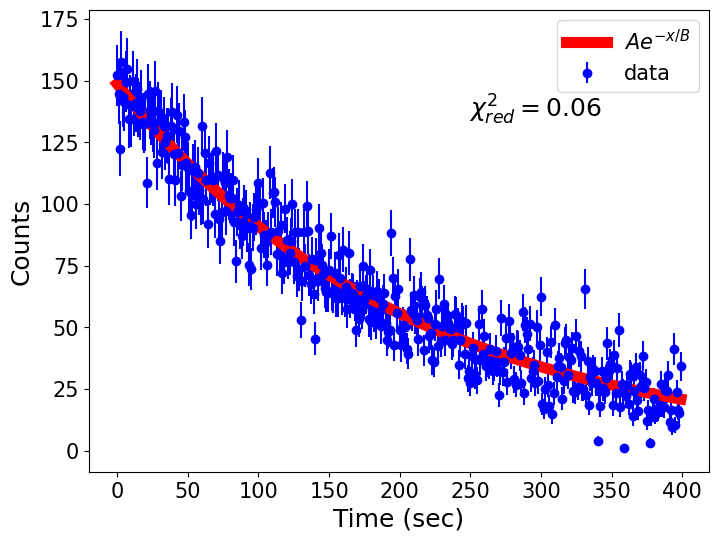

In [103]:
#let's plot the fit and the gaussian from the fitting routine in the same plot
fig, ax = plt.subplots(figsize=(8,6))  #I am creating a canvas for plotting
ax.errorbar(x, data, yerr=np.sqrt(data), fmt='o',  color='blue', label='data') #plotting the data with error bars
ax.plot(x,exp1(x,*popt),color='red',linewidth=8,label='$Ae^{-x/B}$')  #plotting the fit result
fig.text(0.6,0.7,"$\chi^{2}_{red} = %.2f$"%red_chi2,fontsize=18)                                               #Chi2 value
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("Time (sec)", fontsize = 18)
plt.ylabel("Counts", fontsize = 18)


#Half lives calculation from the fitting parameters
Since the fit function $Ae^{-t/B}$ has been used so by comparison $\lambda = 1/B$, therefore, $t_{1/2} = ln(2)\times B$

In [106]:
t12=[]
t12_err=[]
t12.append(np.log(2)*(popt[1]))
t12_err.append(np.log(2)*(perr[1]))
t12

[140.92351909024362]